In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from helper import *


In [63]:
label="2021-06-25-runs/test_new_hom"
mlabel="2021-06-25-runs/test_two_0.0_0_99"
gid="0.0"
pop= "PNs"
N= 800
spike_t= np.load(label+"_"+gid+"_"+pop+"_spike_t.npy")
spike_ID= np.load(label+"_"+gid+"_"+pop+"_spike_ID.npy")
mspike_t= np.load(mlabel+"_"+pop+"_spike_t.npy")
mspike_ID= np.load(mlabel+"_"+pop+"_spike_ID.npy")
t_total= spike_t[-1]
mt_total= mspike_t[-1]

In [54]:
def force_aspect(ax,aspect):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)



In [55]:
def glo_avg(sdf: np.ndarray, n):
    nglo= sdf.shape[1]//n
    gsdf= np.zeros((sdf.shape[0],nglo))
    for i in range(nglo):
        gsdf[:,i]= np.mean(sdf[:,n*i:n*(i+1)],axis=1)
    return gsdf

In [95]:
sample_t= 6000
cnum= 24
batch_t= cnum*sample_t
wds= int(t_total//batch_t) # corresponds to number of odours presented / number of batches
li= 0
sigma_sdf= 100
dt_sdf= 1
lsdfs= []
gsdfs= []
# Let's look at two odors
ichoice= [ 0, 99 ]
jchoice= [[ 8, 20 ], [ 8, 20 ]]
for k in range(2):
    i= ichoice[k]
    # let's look at three example concentrations
    for j in jchoice[k]:
        left= i*batch_t+j*sample_t
        right= left+sample_t
        while li < len(spike_t) and spike_t[li] < left:
            li+= 1
        ri= li
        while ri < len(spike_t) and spike_t[ri] < right:
            ri+= 1
        lsdfs.append(make_sdf(spike_t[li:ri], spike_ID[li:ri], np.arange(0,N), left-3*sigma_sdf, right+3*sigma_sdf, dt_sdf, sigma_sdf))
        gsdfs.append(glo_avg(lsdfs[-1],5))

In [96]:
batch_t= cnum*sample_t
wds= int(t_total//batch_t) # corresponds to number of odours presented / number of batches
li= 0
sigma_sdf= 100
dt_sdf= 1
mlsdfs= []
mgsdfs= []
# Let's look at two odors
i= 20
# let's look at two example concentrations for 99
for j in [ 8, 20 ]:
    left= i*batch_t+j*sample_t
    right= left+sample_t
    while li < len(mspike_t) and mspike_t[li] < left:
        li+= 1
    ri= li
    while ri < len(mspike_t) and mspike_t[ri] < right:
        ri+= 1
    mlsdfs.append(make_sdf(mspike_t[li:ri], mspike_ID[li:ri], np.arange(0,N), left-3*sigma_sdf, right+3*sigma_sdf, dt_sdf, sigma_sdf))
    mgsdfs.append(glo_avg(mlsdfs[-1],5))
print(mgsdfs[0].shape)

(7200, 160)


In [97]:
meansdf= np.zeros((2,gsdfs[0].shape[1]))
for i in range(2):
    for k in range(2):
        meansdf[i,:]+= np.mean(gsdfs[i*2+k],axis=0)
mxid= np.argmax(meansdf, axis= 1)  # this is the strongest glomerulus over all 3 concentrations

(5,)


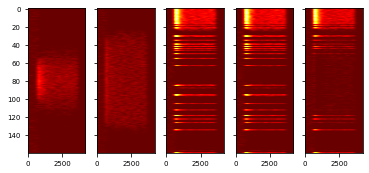

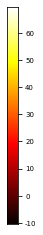

In [100]:
plt.rc('font', size=7) #controls default text size
#plt.rc('axes', titlesize=10) #fontsize of the title
#plt.rc('axes', labelsize=10) #fontsize of the x and y labels
#plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
#plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
#plt.rc('legend', fontsize=10) #fontsize of the legend

fig, ax= plt.subplots(1,5)
print(ax.shape)
ts= np.transpose(gsdfs[2][3000:,:])
ax[0].imshow(ts,vmin= -10,vmax=60,cmap="hot")
force_aspect(ax[0],0.4)
#ax[i*2,k].set_yticklabels([])
#ax[i*2,k].set_xticklabels([])
#ax[i*2+1,k].plot(gsdfs[j][3000:,mxid[i]])
#ax[i*2+1,k].set_ylim([-10,70])
ts= np.transpose(gsdfs[3][3000:,:])
ax[1].imshow(ts,vmin= -10,vmax=60,cmap="hot")
force_aspect(ax[1],0.4)
ax[1].set_yticklabels([])
ts= np.transpose(gsdfs[1][3000:,:])
ax[2].imshow(ts,vmin= -10,vmax=60,cmap="hot")
force_aspect(ax[2],0.4)
ax[2].set_yticklabels([])
ts= np.transpose(mgsdfs[0][3000:,:])
ax[3].imshow(ts,vmin= -10,vmax=60,cmap="hot")
force_aspect(ax[3],0.4)
ax[3].set_yticklabels([])
ts= np.transpose(mgsdfs[1][3000:,:])
ax[4].imshow(ts,vmin= -10,vmax=60,cmap="hot")
force_aspect(ax[4],0.4)
ax[4].set_yticklabels([])

plt.savefig("response_ex.png",dpi=300)
plt.figure()
ax= plt.gca()
ax.imshow(np.reshape(np.arange(-10,70,1),(-1,1)),cmap='hot')
ax.invert_yaxis()
ax.yaxis.tick_right()
ax.set_xticks([])
ax.set_yticks(np.arange(0,80,10))
ax.set_yticklabels(np.arange(-10,70,10))
force_aspect(ax,0.05)
plt.savefig("colorbar.png",dpi=300)